Like other types, `Line` accepts `group` to produce lines with different color for each group of observations

In [1]:
using InMemoryDatasets, DLMReader, StatisticalGraphics

By default `Line` ignores the missing values, however, passing `breaks=true` overrides this behaviour by making break when missing values encountered.

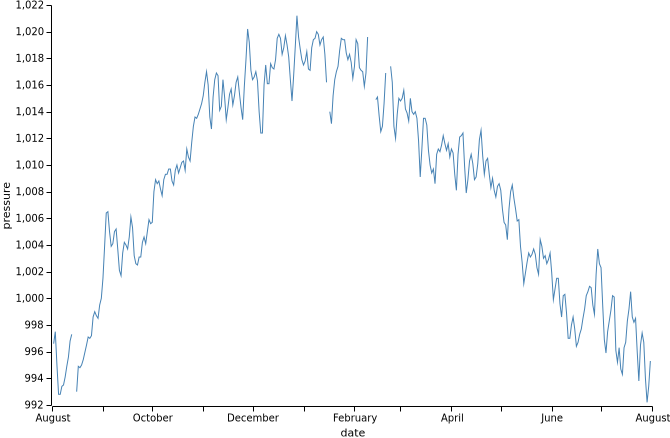

In [2]:
dubai_weather = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "dubai_weather.csv"),
                                 types=Dict(1 =>Date))
sgplot(dubai_weather, Line(x=:date, y=:pressure, breaks=true), xaxis=Axis(type=:date))

Users can overlay a `Scatter` on top of a line plot to include marks at each combination of x and y.

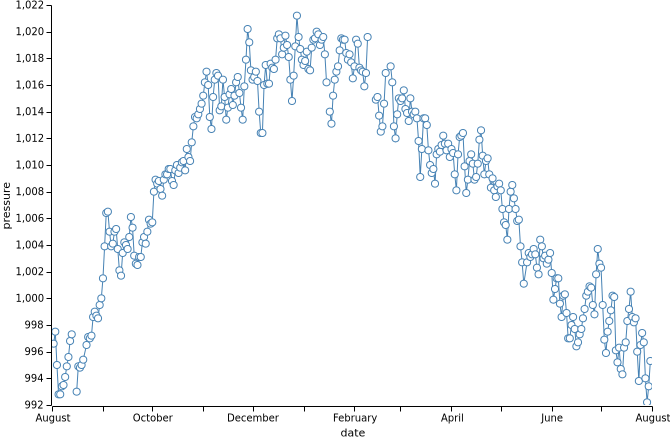

In [3]:
sgplot(dubai_weather, [Line(x=:date, y=:pressure, breaks=true), Scatter(x=:date, y=:pressure)], xaxis=Axis(type=:date))

multiple axes

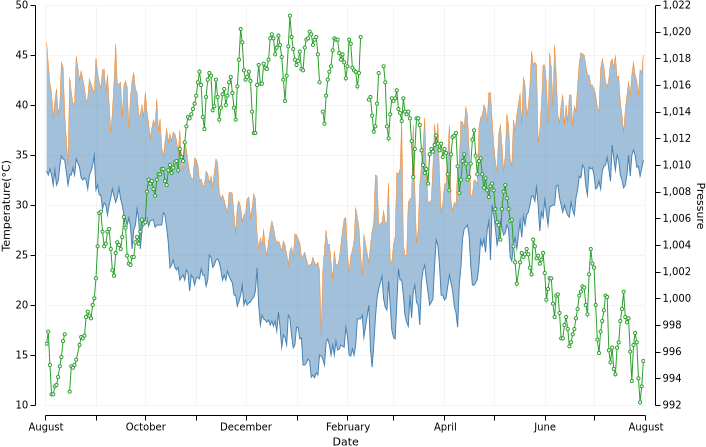

In [4]:
sgplot(
        dubai_weather,
        [
          Band(x=:date, lower=:min, upper=:max),
          Line(x=:date, y=:min, color="#4682b4", thickness=1),
          Line(x=:date, y=:max, color="#ff7f0e", thickness=0.5),
          Line(x=:date, y=:pressure, color="#2ca02c", y2axis=true, breaks=true),
          Scatter(x=:date, y=:pressure, outlinecolor="#2ca02c", size=10, y2axis=true)
        ],
        xaxis=Axis(offset=10, type=:date, grid=true, griddash=[1, 1], title="Date"),
        yaxis=Axis(offset=10, grid=true, griddash=[1, 1], title="Temperature(°C)"),
        y2axis=Axis(offset=10, title="Pressure")
)

The `interpolate` keyword argument can be used to intepolate line,

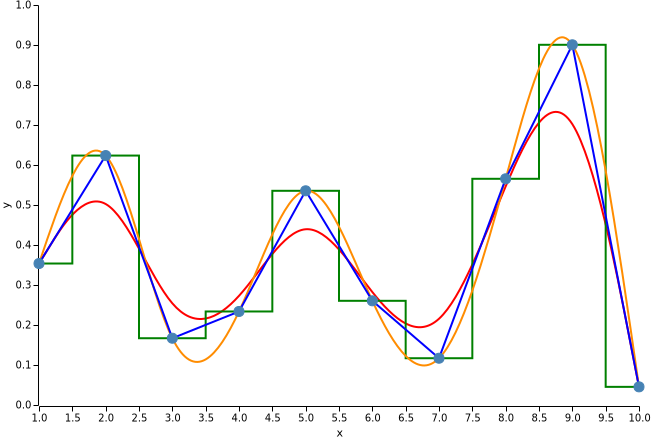

In [5]:
ds = Dataset(x=1:10, y=rand(10))

color=Dict( :linear=>:blue,
            :basis=>:red,
            :step=>:green,
            :natural=>:darkorange
            )

sgplot(ds, [
            [
              Line(x=:x, y=:y, interpolate=v, thickness=2, color=color[v])
              for v in keys(color)
            ]; Scatter(x=:x, y=:y, color=:steelblue, size=100)
            ],
            clip=false
        )

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*